In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode

In [2]:
df = pd.read_csv('Data/emision-co2-autos.csv', encoding="cp1252")

#link http://datos.ambiente.gob.ar/dataset?tags=CO2&tags=Emisiones

In [3]:
df.head()

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_id_motor,vehiculo_cilindrada,vehiculo_potencia,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,lca_numero,fecha_firma,ensayo_gei_numero,ensayo_gei_laboratorio,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto,id_etiqueta
0,TOYOTA,LAND CRUISER 200,SUV,4x4,TOYOTA 1VD-FTV,4461.0,NaN,AUTOMÁTICA,GAS OIL,EURO V,NaN,04/10/2017,H1860666086/241,VINÇOTTE nv,260.70,11.56,8.94,9.90,000001A
1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,RENAULT M4RK7,1997.0,NaN,CVT,NAFTA,EURO V,NaN,22/06/2016,09/09790,UTAC,175.40,10.50,6.10,7.70,000178A
2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaN,R1-0210/17,DELPHI,198.86,11.13,6.98,8.52,000650C
3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4X4,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaN,R1-0209/17,DELPHI,199.74,11.20,7.01,8.55,000659C
4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,CITROËN EP6CDTM (5FM),1598.0,NaN,AUTOMÁTICA,NAFTA,EURO V,NaN,11/10/2011,11/04511,UTAC,177.60,10.60,6.00,7.70,000106A


In [4]:
df.dtypes

vehiculo_marca                object
vehiculo_modelo               object
vehiculo_tipo                 object
vehiculo_traccion             object
vehiculo_id_motor             object
vehiculo_cilindrada          float64
vehiculo_potencia             object
vehiculo_tipo_transmision     object
vehiculo_tipo_combustible     object
vehiculo_standard_emision     object
lca_numero                   float64
fecha_firma                   object
ensayo_gei_numero             object
ensayo_gei_laboratorio        object
emision_CO2                  float64
consumo_urbano               float64
consumo_extraurbano          float64
consumo_mixto                float64
id_etiqueta                   object
dtype: object

In [5]:
df.shape

(432, 19)

In [6]:
# Total de datos faltantes
df.isna().any(axis=1).sum()

332

In [7]:
# Datos faltantes por columna
df.isna().sum()

vehiculo_marca                20
vehiculo_modelo               20
vehiculo_tipo                 20
vehiculo_traccion             20
vehiculo_id_motor             20
vehiculo_cilindrada           21
vehiculo_potencia            307
vehiculo_tipo_transmision     15
vehiculo_tipo_combustible     14
vehiculo_standard_emision     21
lca_numero                   139
fecha_firma                   28
ensayo_gei_numero             20
ensayo_gei_laboratorio        20
emision_CO2                   20
consumo_urbano                22
consumo_extraurbano           22
consumo_mixto                 20
id_etiqueta                   20
dtype: int64

In [8]:
# Elimino las columnas con mayor cantidad de datos faltantes y las que considero que no voy a utilizar para el análisis
df.drop(['vehiculo_potencia','lca_numero', 'vehiculo_id_motor','vehiculo_id_motor','fecha_firma','ensayo_gei_numero','ensayo_gei_laboratorio','id_etiqueta'], axis=1, inplace=True)

In [9]:
df.shape

(432, 12)

In [10]:
df.isna().any(axis=1).sum()

26

In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

vehiculo_marca               0
vehiculo_modelo              0
vehiculo_tipo                0
vehiculo_traccion            0
vehiculo_cilindrada          0
vehiculo_tipo_transmision    0
vehiculo_tipo_combustible    0
vehiculo_standard_emision    0
emision_CO2                  0
consumo_urbano               0
consumo_extraurbano          0
consumo_mixto                0
dtype: int64

In [13]:
df.head()

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,TOYOTA,LAND CRUISER 200,SUV,4x4,4461.0,AUTOMÁTICA,GAS OIL,EURO V,260.70,11.56,8.94,9.90
1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,1997.0,CVT,NAFTA,EURO V,175.40,10.50,6.10,7.70
2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,1998.0,MANUAL,NAFTA,EURO V,198.86,11.13,6.98,8.52
3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4X4,1998.0,MANUAL,NAFTA,EURO V,199.74,11.20,7.01,8.55
4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,1598.0,AUTOMÁTICA,NAFTA,EURO V,177.60,10.60,6.00,7.70


In [14]:
df['vehiculo_marca'].value_counts()

HYUNDAI              31
MERCEDES-BENZ        31
CHEVROLET            25
BMW                  23
AUDI                 21
TOYOTA               20
FORD                 18
RENAULT              17
FIAT                 17
MINI                 16
HONDA                15
VOLKSWAGEN           15
PEUGEOT              13
NISSAN               12
CITROËN              10
CHANGAN               9
LIFAN                 8
LEXUS                 8
JEEP                  7
SUZUKI                7
LAND ROVER            6
PEUGEOT / CITROËN     6
FAW                   5
DOMY                  4
JAC                   4
BAIC                  4
BORGWARD              4
ZOTYE                 4
MASERATI              4
ALFA ROMEO            4
DS                    3
MITSUBISHI            3
KIA                   3
HAVAL                 3
PORSCHE               3
FOTON                 2
ZANELLA               2
CHERY                 2
VOLVO                 2
RAM                   2
ISUZU                 2
SUBARU          

In [15]:
df['vehiculo_tipo'].value_counts()

SEDÁN 4 PUERTAS                          39
SEDÁN 5 PUERTAS                          38
RURAL                                    29
SUV                                      28
BERLINA                                  21
                                         ..
FAMILIAR RURAL                            1
COUPÉ 3 + 2 PUERTAS                       1
SEDÁN 4 PUERTAS CON TAPA BAÚL NB          1
MOMOVOLÚMEN 4PUERTAS Y PORTÓN TRASERO     1
BERLINA 4 PUERTAS CON PORTÓN TRASERO      1
Name: vehiculo_tipo, Length: 98, dtype: int64

In [16]:
df['vehiculo_traccion'].value_counts()

4x2          285
4x4           92
4x2 / 4x4     11
4x2 - 4x4      9
4x2 4x4        5
4X4            3
4X2            1
Name: vehiculo_traccion, dtype: int64

In [17]:
df['vehiculo_tipo_transmision'].value_counts()

AUTOMÁTICA                                      207
MANUAL                                          143
CVT                                              33
AUTOMATICA                                        9
MANUAL (RF 3.538)                                 2
AUOTMÁTICA                                        2
AUTIMÁTICA                                        2
MANUAL (RF 3.917)                                 2
AUTOMÁTICA DCT                                    2
MANUAL AUTOMATIZADA                               1
CTT                                               1
E-CVT (Hibrida controlada electrónicamente)       1
AUTOMÁTIA                                         1
Name: vehiculo_tipo_transmision, dtype: int64

In [18]:
df['vehiculo_tipo_combustible'].value_counts()

NAFTA                   316
GAS OIL                  61
NAFTA / ELECTRICIDAD     25
DIESEL                    4
Name: vehiculo_tipo_combustible, dtype: int64

In [19]:
df['vehiculo_standard_emision'].value_counts()

EURO V        264
EURO VI b      49
EURO VI c      39
EURO VI        24
EURO  V        18
EURO VI a       5
EURO VI d       5
EURUO V         1
EURO  VI b      1
Name: vehiculo_standard_emision, dtype: int64

In [35]:
# Analizamos la correlación de las variables cuantitativas
vcuant_cols=['emision_CO2','vehiculo_cilindrada','consumo_urbano','consumo_extraurbano','consumo_mixto']

In [36]:
# Matriz de correlación
df[vcuant_cols].corr()

,emision_CO2,vehiculo_cilindrada,consumo_urbano,consumo_extraurbano,consumo_mixto
emision_CO2,1.000000,0.683642,0.491818,0.920018,0.022332
vehiculo_cilindrada,0.683642,1.000000,0.340904,0.650785,-0.005610
consumo_urbano,0.491818,0.340904,1.000000,0.410066,-0.010751
consumo_extraurbano,0.920018,0.650785,0.410066,1.000000,0.028818
consumo_mixto,0.022332,-0.005610,-0.010751,0.028818,1.000000


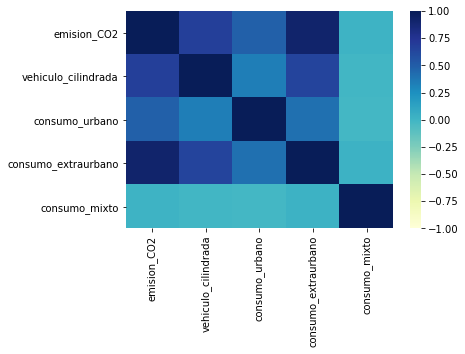

In [37]:
# Visualizamos la matriz a traves de heatmap
sns.heatmap(df[vcuant_cols].corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

In [23]:
# Importo los modelos para hacer la predicción a traves de una regresión
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [49]:
feature_cols = ['vehiculo_cilindrada','consumo_urbano','consumo_extraurbano','consumo_mixto']

X = df[feature_cols]
y = df['emision_CO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

lm = linear_model.LinearRegression()

model_1 = lm.fit(X_train, y_train)

print('Score model_1:', model_1.score(X_train, y_train))

Score model_1: 0.8584243545597303


In [50]:
y_pred=lm.predict(X_test)

In [51]:
print ('Score model_1_predict:',r2_score(y_test, y_pred))

Score model_1_predict: 0.9095626337888649
